<a href="https://colab.research.google.com/github/sitthatkaja/multivariate/blob/main/Chapter_6_Cluster_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Cluster Analysis**

คือการที่เรามี data มาแล้วเราต้องการจะจัดกลุ่มของ data นั้นๆ เราจะแบ่งลักษณะของ data ที่เหมาะกัน ให้อยู่กลุ่มเดียวกัน

เช่น การวัดระยะห่างระหว่างจุด เราก็จะนำระยะห่างนั้นมาเป็นการแบ่งกลุ่ม

In [1]:
import pandas as pd

In [2]:
example_df = pd.read_csv('https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')
example_df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:

example_df_drop = example_df.iloc[:,:-1]
example_df_drop

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
#Import
from sklearn.cluster import KMeans

In [30]:
#Define
kmeans = KMeans(n_clusters=3,random_state=2021)

In [31]:
#Fit-Transfrom
kmeans.fit(example_df_drop)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

In [32]:
# calculated
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [33]:
# จัดกลุ่ม
y = kmeans.predict(example_df_drop)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

Quiz 6 ทำ PCA ข้อมูล Example_df_drop แล้วกราฟ Scatter plot โดยใส่สีตามผลการทำ kmeans clustering แล้วนำมาเทียบ กราฟ PCA- scatter ข้อมูลจริง

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
new_pca = pca.fit_transform(example_df_drop)

In [20]:
from matplotlib import pyplot as plt

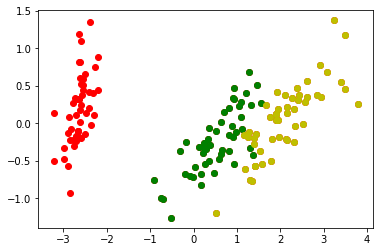

In [21]:
plt.plot(new_pca[:,0],new_pca[:,1],'or')
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'og')
plt.plot(new_pca[100:,0],new_pca[100:,1],'oy')

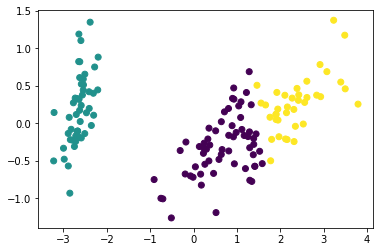

In [22]:
kmeans = KMeans(n_clusters=3, random_state=2021)
kmeans.fit(example_df_drop)
y = kmeans.predict(example_df_drop)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

SSE

In [40]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [41]:
new_cluster_center = pca.transform(kmeans.cluster_centers_)
new_cluster_center

array([[ 0.67443933, -0.31390945],
       [-2.64084076,  0.19051995],
       [ 2.37438946,  0.2614839 ]])

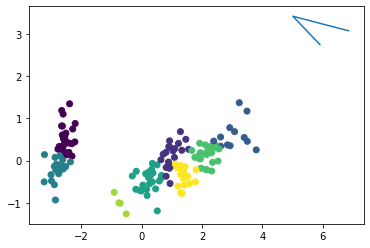

In [42]:
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1])

ในกรณีใช้ค่า Default

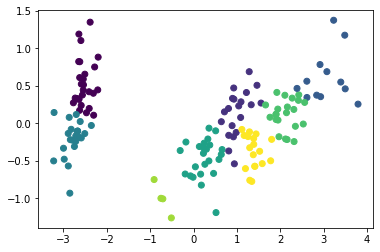

In [35]:
kmeans_def = KMeans(random_state=2021)
kmeans_def.fit(example_df_drop)
y = kmeans_def.predict(example_df_drop)

plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

ค่า K ควรจะเป็นเท่าไหร่

https://realpython.com/k-means-clustering-python/#choosing-the-appropriate-number-of-clusters

Elbow Method

SSE

In [43]:
kmeans.inertia_ ##SSE 

78.94084142614602

In [47]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
  kmeans_def = KMeans(n_clusters=k,random_state=2021)
  kmeans.fit(example_df_drop)
  SSE.append(kmeans)

In [48]:
SSE

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=2021, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=2021, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=2021, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=2021, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=2021, tol=0.0001, verbose=0),
 KMeans(algorit

มันผิด